<a href="https://colab.research.google.com/github/AsifKarimShaik/AsifKarimShaik/blob/main/0_FeatureEngineering_DimensionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Dimension Reduction
------------------------------------
**Dr. Dave Wanik - University of Connecticut**

ML models are pattern-based models... so let's make some more features for modeling in hopes these patterns might result in a more accurate prediction. We will give you a taste of using a random forest model in this notebook.

Later on, you can try using LASSO regression to identify a subset of the most useful polynomial features and then run RF on those outputs! The sky is the limit here with your feature engineering and dimension reduction. Appreciate the fluidity of creating tons of features (new representations of data) and shrinking them down to a subset vs. modeling with ALL OF THEM!!!

-----------------------------------
* We will make new features with polynomial features and interaction terms.

* If we have categorical data, we will need to recode it to dummy variables first before doing any of this feature engineering.

* And if we find we may have too many columns vs. rows (known as 'the curse of dimensionality'), we can use PCA to get a subset of variables that maintain 95% of the variance (signal) of the training data.

Let's use the CA housing data because there is categorical column at the very end related to 'Ocean Proximity'. We will turn it into 0/1 dummy columns.
  * Here's a link that describes the data, read this before you get started: https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv

The name of the game in this notebook is ACCURACY - we are going to feature-engineer the training data in hopes that it might result in a better fitting model.


# Getting Started

In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression # LR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# we'll use this for some feature engineering
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures # interaction terms and polynomials
from sklearn.decomposition import PCA # prinicpal components

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in some data
df = pd.read_csv('/content/drive/MyDrive/Online Materials/Module 2: Dirty Data and Parametric Models/Week 3: Feature Engineering and Advanced Linear Models/data/housing_withCategorical.csv')

In [ ]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df.dtypes)

# right away you see this 'valid' column is an 'object', which means it's a string
# AKA something you can't do math on... look at the head and see what's going on
# in that column. ALL OTHER DATA IS NUMERIC (float64)
# this is a good quiz question... ;)

print("\nThis is the head:") # see how I can pop that \n anywhere?
df.head()   # also note how much stuff I have pasted in ONE CELL...
            # now you are cooking with gas!

# the head confirms to use that the valid column is some type of time/date stamp
# we need to stop what we are doing and take care of this NOW!

# nice big data... 20K rows and 10 columns... and LOOK!
# there is a categorical (object column)
# let's check it out

This is the shape :
 (20640, 10) 

These are the column names: 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') 

These are the data types: 
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

This is the head:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# any missing data?
df.info()

# oops - you bet it does... the 'total_bedrooms' column is missing a few

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# since my dataset is so big, I'm just gonna drop those missing rows.
# link: https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php#:~:text=0%2C%20or%20'index'%20%3A,columns%20which%20contain%20missing%20value.

df.dropna(axis=0, inplace=True)

# check your work - good to go!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# check out the unique values in ocean_proximity
# link: https://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column
df.groupby('ocean_proximity')['ocean_proximity'].count()

# so we have five 'levels' within this categorical variable
# let's turn this into 5 dummy 0/1 variables then
# ditch the original column (ML models only like numeric data)

ocean_proximity
<1H OCEAN     9034
INLAND        6496
ISLAND           5
NEAR BAY      2270
NEAR OCEAN    2628
Name: ocean_proximity, dtype: int64

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

# Get Dummies
This code snippet is a little advanced - it turns ocean_proximity into five 0/1 columns and joins it to the dataframe. This is the most efficient way to do this.

In [ ]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
# get_dummies from pandas
# link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
# link: https://stackoverflow.com/questions/23208745/adding-dummy-columns-to-the-original-dataframe

# concat just 'smooshes' two dataframes together.. so make sure you don't shuffle!
# concat is NOT the same thing as merge

df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
# check your work
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [ ]:
# now let's drop that repetitive ocean_proximity column to clean up the data
# then we can start to have some fun!
del df['ocean_proximity']

In [ ]:
# check your work - looks good
print(df.dtypes)
df.head() # the 0.1 variables are stored as integers - that is fine!

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Data Splitting (X and Y) and (X_train_plain, X_test_plain, etc.)

In [ ]:
# first, keep yourself organized and be reminded of all the rows and columns you have
df.shape # >20k rows and 14 columns.

# great! a good rule of thumb is 10:1 ratio between rows and columns
# that is, you should have 10X as many rows as columns
# the more rows, the better.

(20433, 14)

In [ ]:
# our target variable is 'median_house_value'
# everything else is a covariate
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

print(X.shape, y.shape)

(20433, 13) (20433,)


In [ ]:
# here's a plain split for us to compare to later
# now we can split and then fit the model!
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=123)

In [ ]:
# check your work - does the shape match what you think it should be?
print(X_train_plain.shape, X_test_plain.shape, y_train_plain.shape, y_test_plain.shape)

(16346, 13) (4087, 13) (16346,) (4087,)


# Polynomial and Interaction Terms (X_train_poly, X_test_poly etc.)
**Read this first:** https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

That example has 3 rows and 2 columns. After running PolynomialFeatues(2), where 2 means raise to the second power, you get 6 columns and three rows. The first column is just a bunch of 1s (we'll delete this later), followed by the original data (2 columns), the original data raised to the 2nd power (2 columns), and the interaction of the original data (1 column).

Go look at the documentation and make sure you understand what we did - because it is about to BLOW UP!

In [ ]:
# here's another more advanced example
# related to the documentation
X1 = np.arange(6).reshape(3, 2)
X1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
# see what it does
# polynomial terms and interaction terms
# 1, a, b, a^2, a*b, b^2
poly = PolynomialFeatures(2, interaction_only=False)
poly.fit_transform(X1)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
# just interaction terms
# 1, a, b, a*b
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X1)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [ ]:
# see what it does
# polynomial terms and interaction terms
# 1, a, b, a^2, (a*b), b^2, a^3, a^2*b), b^2*a, b^3
poly = PolynomialFeatures(3, interaction_only=False)
poly.fit_transform(X1)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
# just interaction terms
# if you only return interaction terms, the degree of the polynomial doesn't matter
# 1, a, b, a*b
poly = PolynomialFeatures(10, interaction_only=True)
poly.fit_transform(X1)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [ ]:
X.shape

(20433, 13)

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=True) # you square it, raise to second power
X = poly.fit_transform(X)

# this is stored as a numpy array
# let's store these as a pd dataframe
X = pd.DataFrame(X)
print(X.shape) # woah!
X.head() # we lost our column names but that is OK for now...

(20433, 92)


,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,1.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# at this point, do I really care about those variables? No!
# they are just something numeric for the model to crunch on,
# and we are going to hope we get a more accuate model.

In [ ]:
# that first column looks annoying (all 1's, so I'm gonna drop it)
del X[0]
print(X.shape) # went from 105 to 104... good.

(20433, 91)


Everything after this is stuff you already know....
* Split into train and test partitions
* Use MinMaxScaler on train using fit_transform() then APPLY to the test data (it's like applying a coordinate system)
* We will then show one more trick, Pricipal Components Analysis (to shrink our 104 X columns into a subset that maintain all of the diversity (can help our model run faster!)

In [ ]:
# now we can split and then fit the model!
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, # remember, X is now huge - 105 columns!
                                                        y,
                                                        test_size=0.2,
                                                        random_state=123) # useful for picking rows consistently

In [ ]:
# check your work - does the shape match what you think it should be?
print(X_train_poly.shape, X_test_poly.shape, y_train_poly.shape, y_test_poly.shape)

(16346, 91) (4087, 91) (16346,) (4087,)


In [ ]:
# # convert these all to numpy arrays
# X_train_poly = np.array(X_train_poly)
# X_test_poly = np.array(X_test_poly)
# y_train_poly = np.array(y_train_poly)
# y_test_poly = np.array(y_test_poly)

Min/Max Scaling will be applied to the poly features.

In [ ]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# PCA (X_train_pca, X_test_pca, etc.)
This is from your textbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Something new! This is a bit advanced, and moreso shown as FYI - but you can read about it. This function will squish our 104 covariates into a smaller subset of variables that are 1) uncorrelated but 2) explain at least X percent of the diversity/variance within our dataset.

You MUST do MinMaxScaler() before applying PCA (just as we did above).

AGAIN... you fit on TRAIN... then apply the PCA to the TEST data to ensure there is no leakage.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance (Can choose an number between 0.8 and 0.999)
# pca.fit(X_train_poly)              # you can choose which to use.. the higher the number, the more components
X_train_pca = pca.fit_transform(X_train_poly)

In [ ]:
# see what you did! WOAH! Only a few columns that explain 95% of the variance
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head()

(16346, 6)


,0,1,2,3,4,5
0,1.299619,-0.569445,-0.080066,-0.389228,-0.207380,0.119886
1,1.383047,-0.552318,-0.166331,-0.258730,0.272903,0.021308
2,1.230787,-0.720705,0.140970,0.735321,-0.449370,0.309175
3,0.383068,1.647130,-1.228621,-0.111792,-0.074127,-0.195756
4,1.331945,-0.593775,-0.072564,-0.106500,-0.035885,-0.254728


In [ ]:
# same as before, now you APPLY that PCA coordinate system
# to the test data
X_test_pca = pca.transform(X_test_poly)

In [ ]:
# see what you did! WOAH! Only five columns that explain 95% of the variance
# see how we have a consistent number of columns between X_test_pca and X_train_pca?
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape)
X_test_pca.head()

(4087, 6)


,0,1,2,3,4,5
0,0.236925,0.959583,1.484450,0.150692,-0.323726,-0.118016
1,1.394297,-0.574250,-0.150011,-0.038609,0.297341,0.019020
2,1.389164,-0.526324,-0.199313,-0.555999,0.119260,0.010616
3,-1.007976,-0.386319,0.094912,0.550653,-0.169545,-0.361431
4,0.228445,0.943555,1.490528,0.214025,-0.313994,-0.045737


In [ ]:
# the y variables are the same as before
y_train_pca = y_train_plain
y_test_pca = y_test_plain

In [ ]:
tmp = pca.explained_variance_ratio_

In [ ]:
np.sum(tmp)

0.9522859855222835

# Models
Cool... we have had a ton of fun with the data...
and actually, we've created 3 different versions of the data
* (X_train_plain, X_test_plain) the original dataset with dummy vars, with MinMaxScaler (14 columns)
* (X_train_poly, X_test_poly) the poly and interaction terms, with 104 columns and MinMax scaler
* (X_train_pca, X_test_pca) then we applied PCA to the data to see if we could get a subset of data that still fit accurately (5 columns).

Other thoughts...
  * Note how we haven't touched Y - leave it alone!

  * And BTW - EVERYTHING UP UNTIL THIS POINT works for classification models too - we've just done some cool data prep.

  * Let's see which of these is the best (in practice, you might try all of these methods to try to squeeze extra performance out of your model).

## clf_plain

In [ ]:
# first, a plain model...
# look how consistent I am with my names...
# don't worry if this takes a minute to fit
clf_plain = LinearRegression()
clf_plain = clf_plain.fit(X_train_plain, y_train_plain)

# store the predictions
train_preds_plain = clf_plain.predict(X_train_plain)
test_preds_plain = clf_plain.predict(X_test_plain)
print(clf_plain.score(X_train_plain, y_train_plain)) # quick peak at R2 on train
print(clf_plain.score(X_test_plain, y_test_plain)) # quick peak at R2 on test

0.6460918634898758
0.6473892433420732


## clf_poly

In [ ]:
# now the poly model
# don't worry if this takes a minute to fit... there are a boatload of features!
clf_poly = LinearRegression()
clf_poly = clf_poly.fit(X_train_poly, y_train_poly)

# store the predictions
train_preds_poly = clf_poly.predict(X_train_poly)
test_preds_poly = clf_poly.predict(X_test_poly)
print(clf_poly.score(X_train_poly, y_train_poly)) # quick peak at R2 on train
print(clf_poly.score(X_test_poly, y_test_poly)) # quick peak at R2 on test

0.7026064075863476
-3.024215759161154e+16


## clf_pca

In [ ]:
# now the pca model
clf_pca = LinearRegression()
clf_pca = clf_pca.fit(X_train_pca, y_train_pca)

# store the predictions
train_preds_pca = clf_pca.predict(X_train_pca)
test_preds_pca = clf_pca.predict(X_test_pca)
print(clf_pca.score(X_train_pca, y_train_pca)) # quick peak at R2 on train
clf_pca.score(X_test_pca, y_test_pca) # quick peak at R2 on test
# it's a little worst then the other two,
# but not bad for getting essentially the same results with less data!
# and it didn't take the model as long to fit.

0.548070923837459


0.5474451391548509

# Metrics

In [ ]:
# 2) mae - plain
trainMAE_plain = mean_absolute_error(y_train_plain, train_preds_plain)
print("This is trainMAE (plain):", trainMAE_plain) # train
testMAE_plain = mean_absolute_error(y_test_plain, test_preds_plain)
print("This is testMAE (plain):", testMAE_plain) # test

# 2) mae - poly
trainMAE_poly = mean_absolute_error(y_train_poly, train_preds_poly)
print("This is trainMAE (poly):", trainMAE_poly) # train
testMAE_poly = mean_absolute_error(y_test_poly, test_preds_poly)
print("This is testMAE (poly):", testMAE_poly) # test

# 2) mae - pca
trainMAE_pca = mean_absolute_error(y_train_pca, train_preds_pca)
print("This is trainMAE (pca):", trainMAE_pca) # train
testMAE_pca = mean_absolute_error(y_test_pca, test_preds_pca)
print("This is testMAE (pca):", testMAE_pca) # test

This is trainMAE (plain): 50012.294580071815
This is testMAE (plain): 48968.46441798672
This is trainMAE (poly): 44860.52086137281
This is testMAE (poly): 308020265662.7859
This is trainMAE (pca): 57294.301361616905
This is testMAE (pca): 55720.22260241776


# Scatterplots
Let's do a quick graphical check on how the models fit (you can run the other regression error metrics on your own - left as an exercise).

## clf_plain

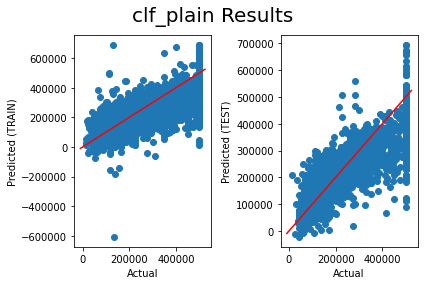

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("clf_plain Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_plain, y=train_preds_plain) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test_plain, y=test_preds_plain) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## clf_poly

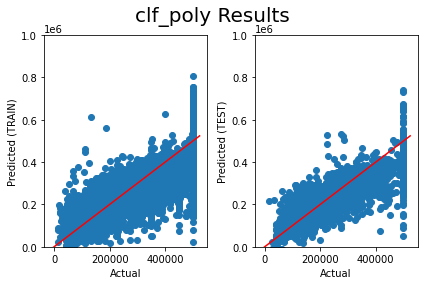

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("clf_poly Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_poly, y=train_preds_poly) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
axes[0].set_ylim([0,1e6])

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test_poly, y=test_preds_poly) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
axes[1].set_ylim([0,1e6])

# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## clf_pca

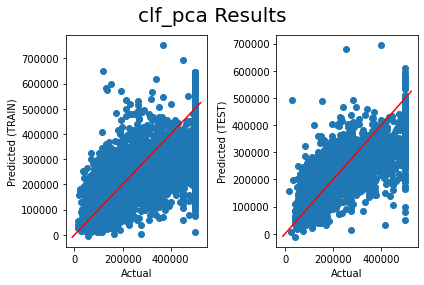

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
fig.suptitle("clf_pca Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_pca, y=train_preds_pca) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

axes[1].scatter(x=y_test_pca, y=test_preds_pca) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Done!
So what you've seen here are a few useful data prep techniques that may help getting your model to fit. While the original data was still best, it was kind of fun to explore these other methods. With hyperparameter tuning, results might even improve - but in general, the models fit pretty similarly (so choose the simple model - this is known as 'parsimony').

*   get_dummies() was useful for converting categorical variables into 0/1 variables
*   PolynomialFeatures() was used to get both a) the interaction of variables and b) variables raised to a power. The key concept is: the more data there is, the better than chance the model might find a new pattern to fit on.
* Principle Components Analysis (PCA) was used to squish down our >100 predictors into ~5 predictors (principal components) that were able to achieve the same level of accuracy. The model fit FASTER (since there was less data), but the principal components aren't really interpretable. Either way, they are fun to use and help break 'the curse of dimensionality' (when you have too many columns and not enough rows).


**And remember** - all of this dummy, poly and pca stuff can be used for classification problems, too!

